# Machine Learning Problem Set 4

Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm.

This is the [Dataset](https://www.kaggle.com/datasets/henrysue/online-shoppers-intention) you can use for this question.

In [74]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

# Import statistics tools

import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

# Import scikit-learn frameworks
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read data and save as a DataFrame

df = pd.read_csv("./Datasets/online_shoppers_intention.csv")

In [7]:
# Check the first 5 rows of the dataset

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Attribute Information

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue', 'Weekend' and 'Informational_Duration' attributes are used as the label features. 

"Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated" and "ProductRelated_Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The "BounceRates", "ExitRates" and "PageValues" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "BounceRates" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of "ExitRates" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "SpecialDay" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [8]:
# Check the number of null values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# Check the shape

df.shape

(12330, 18)

In [11]:
# Check the datatypes of the features

df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [12]:
# Descriptive Statistics

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Univariate Analysis

In [13]:
df["Administrative"].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

In [49]:
def count_plot(df, col):
    plt.figure(figsize=(20,8))
    ax = sns.countplot(x=df[col], order=df[col].value_counts().head(10).index, color='orange')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45, size=22) 
    ax.set_yticklabels(ax.get_yticklabels(),rotation=0, size=22) 
    ax.set_ylabel('Count',size=25) 
    ax.set_xlabel(col,size=25) 
    plt.show()

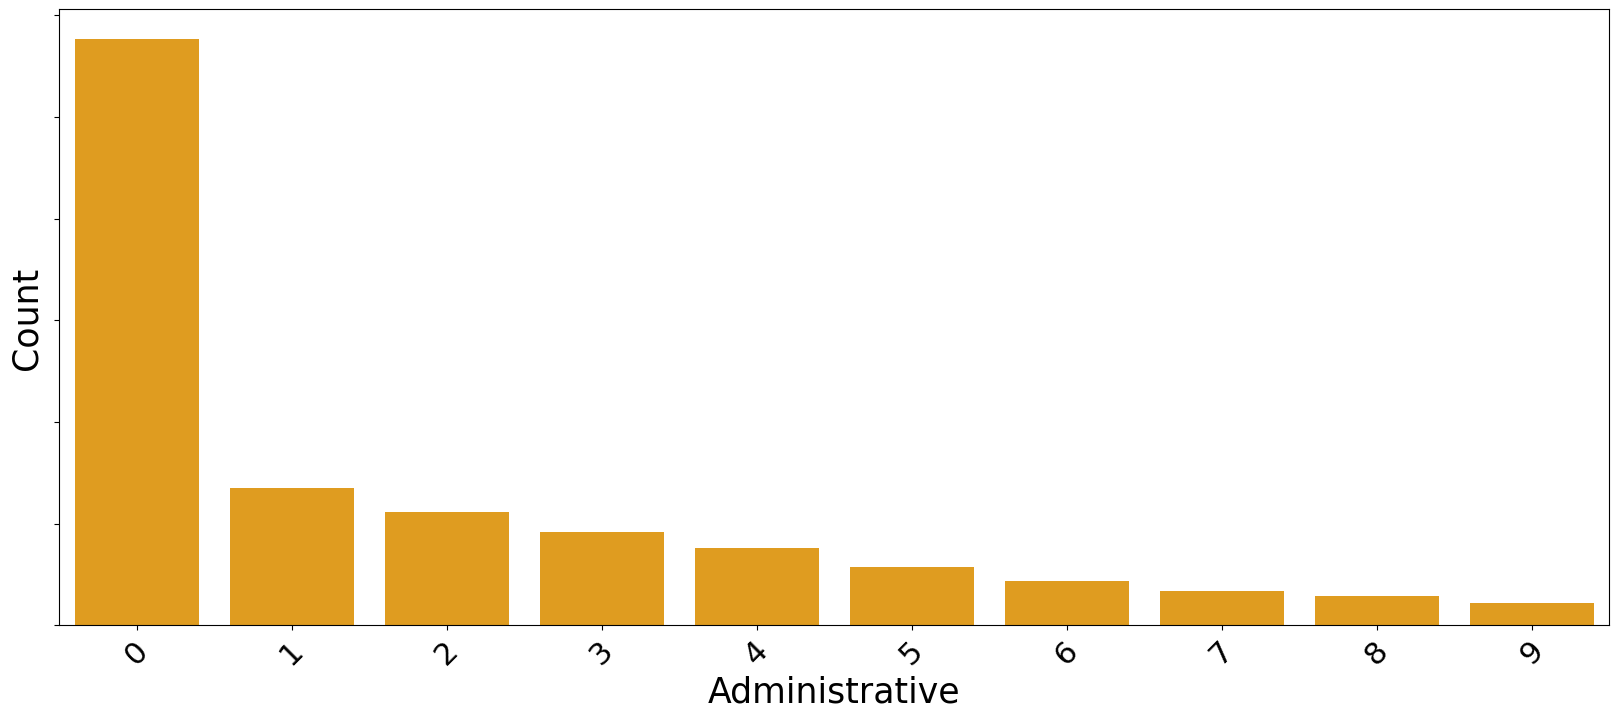

In [50]:
count_plot(df, 'Administrative')

In [51]:
df['Administrative_Duration'].value_counts()

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64

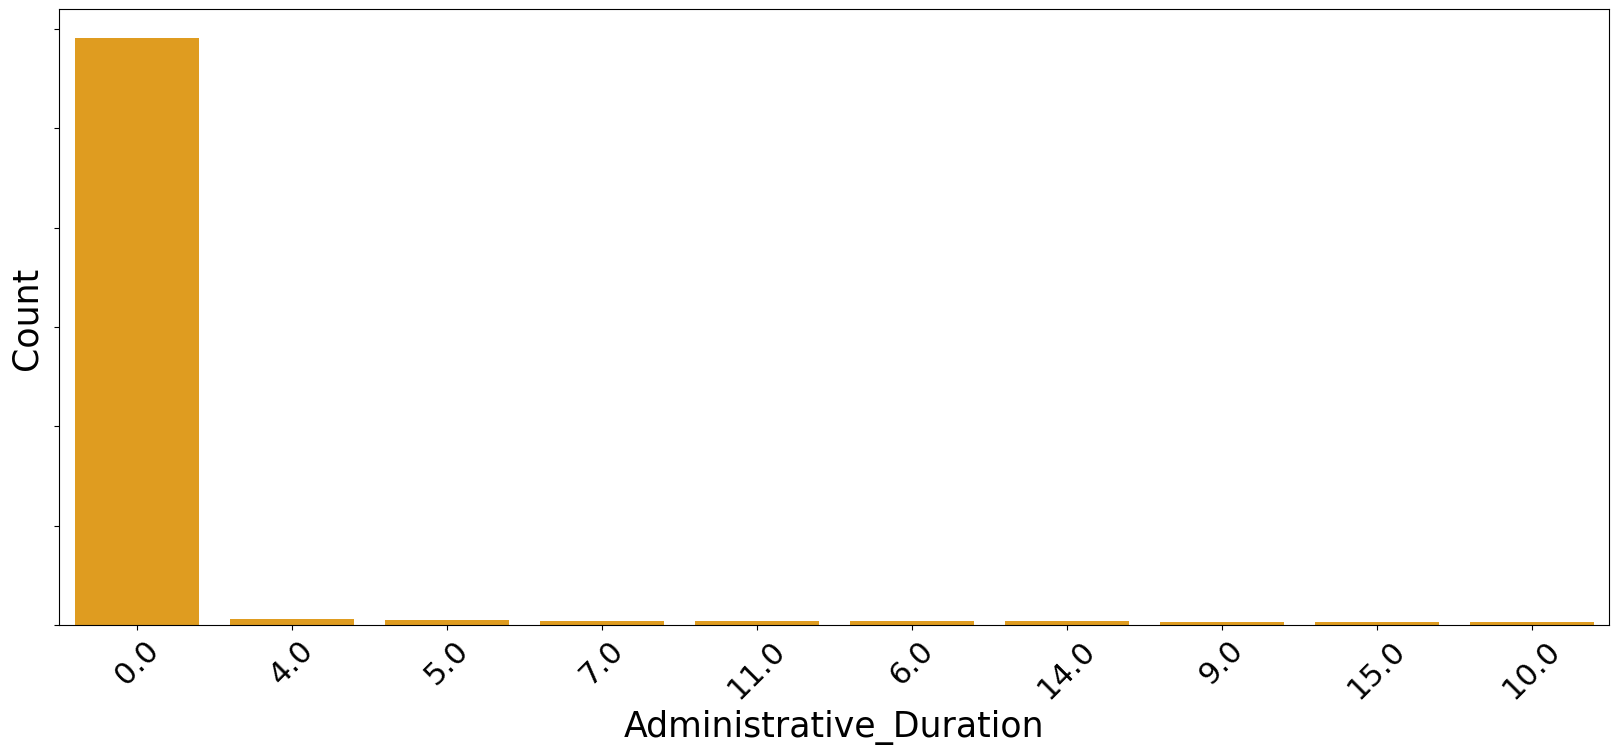

In [52]:
count_plot(df, 'Administrative_Duration')

In [53]:
df['Informational'].value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64

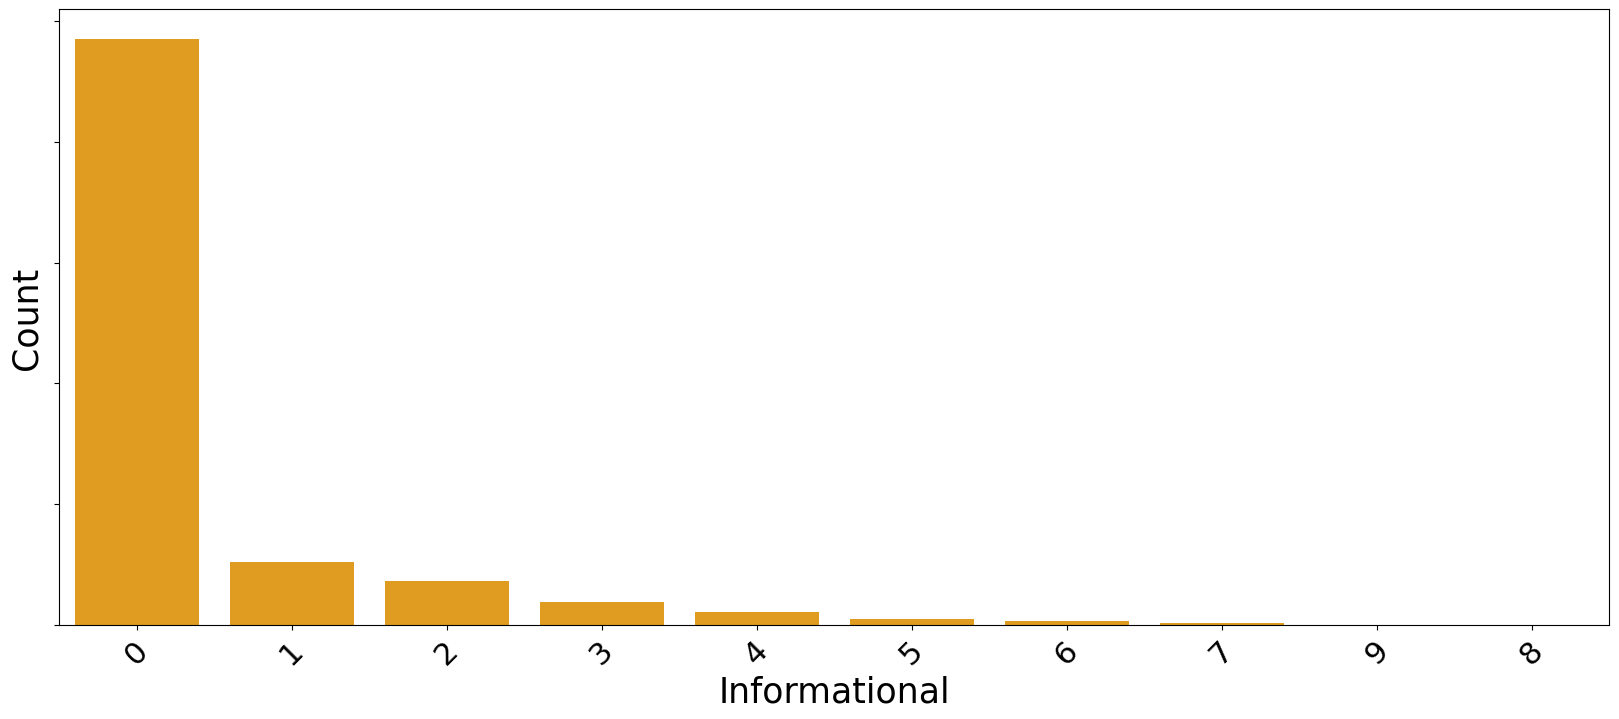

In [54]:
count_plot(df, 'Informational')

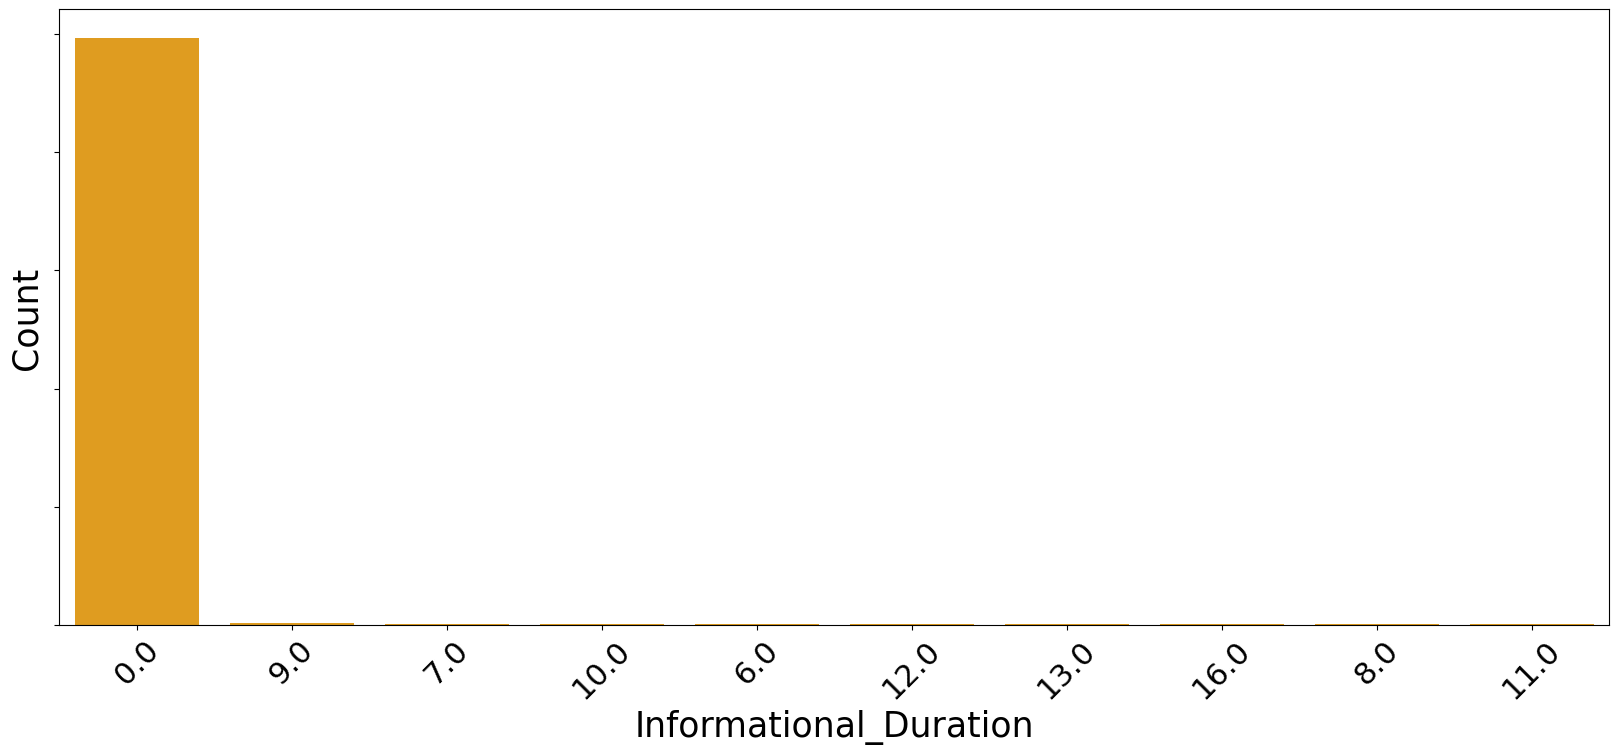

In [55]:
count_plot(df, 'Informational_Duration')

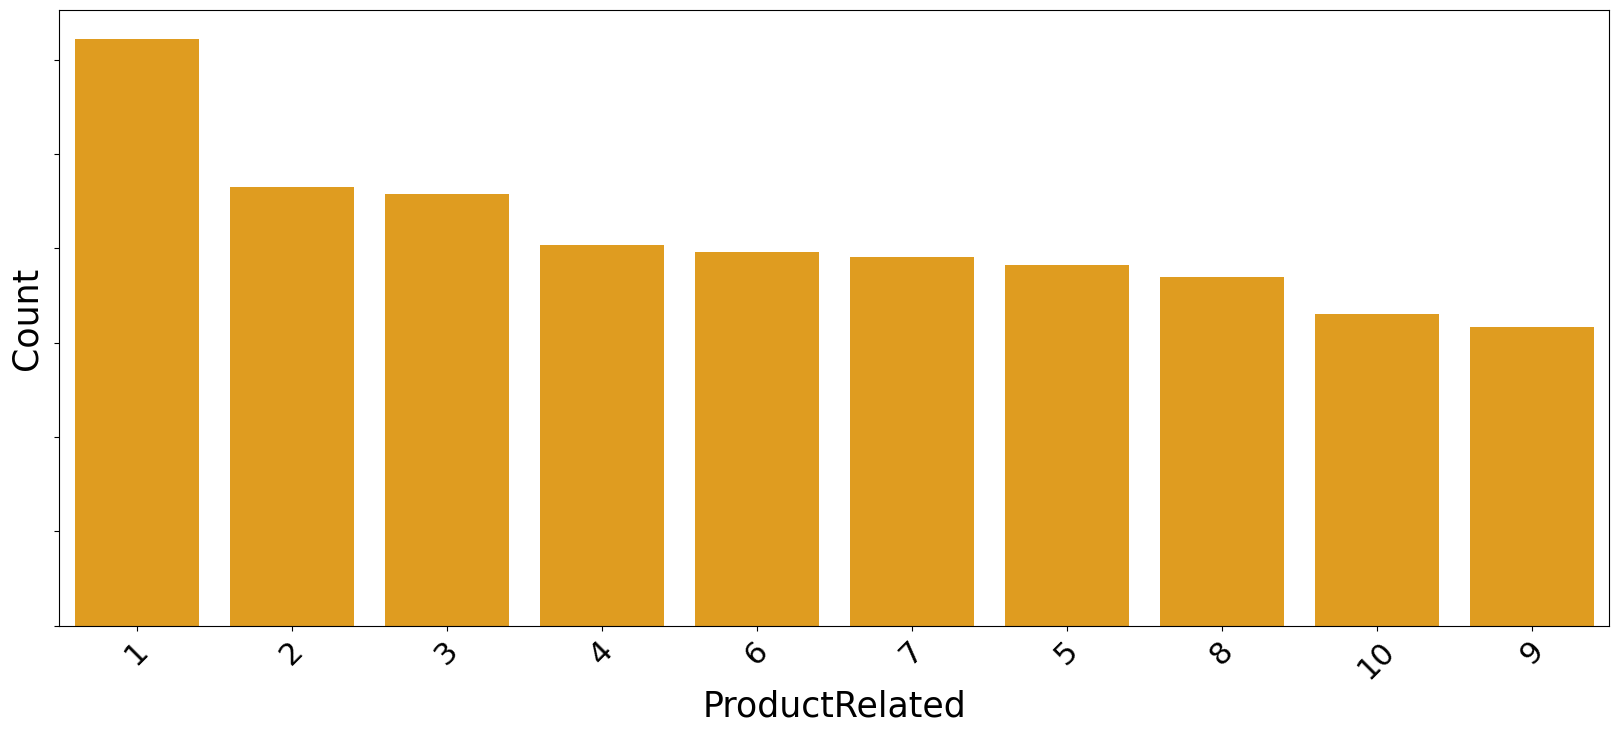

In [56]:
count_plot(df, 'ProductRelated')

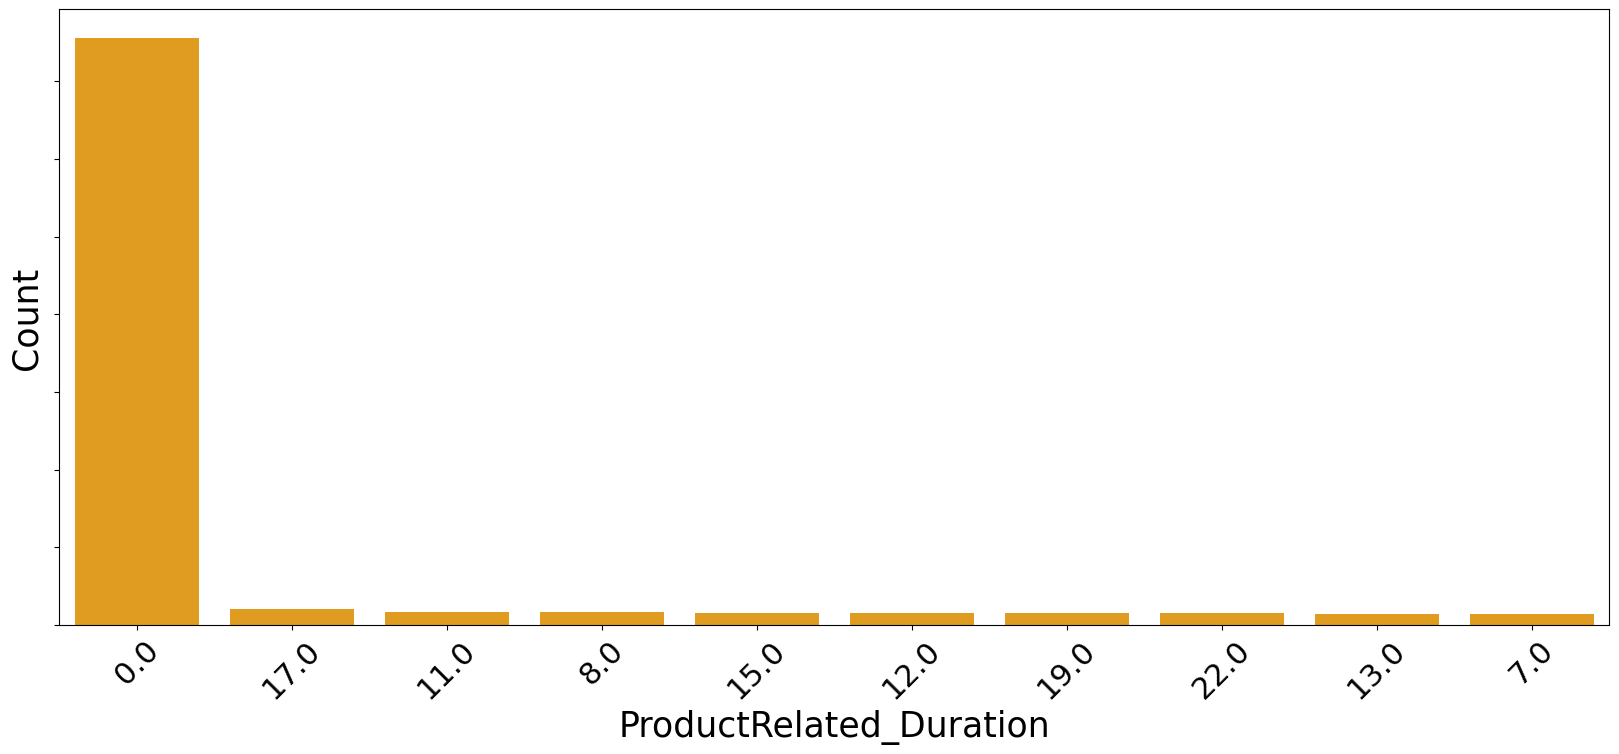

In [57]:
count_plot(df, 'ProductRelated_Duration')

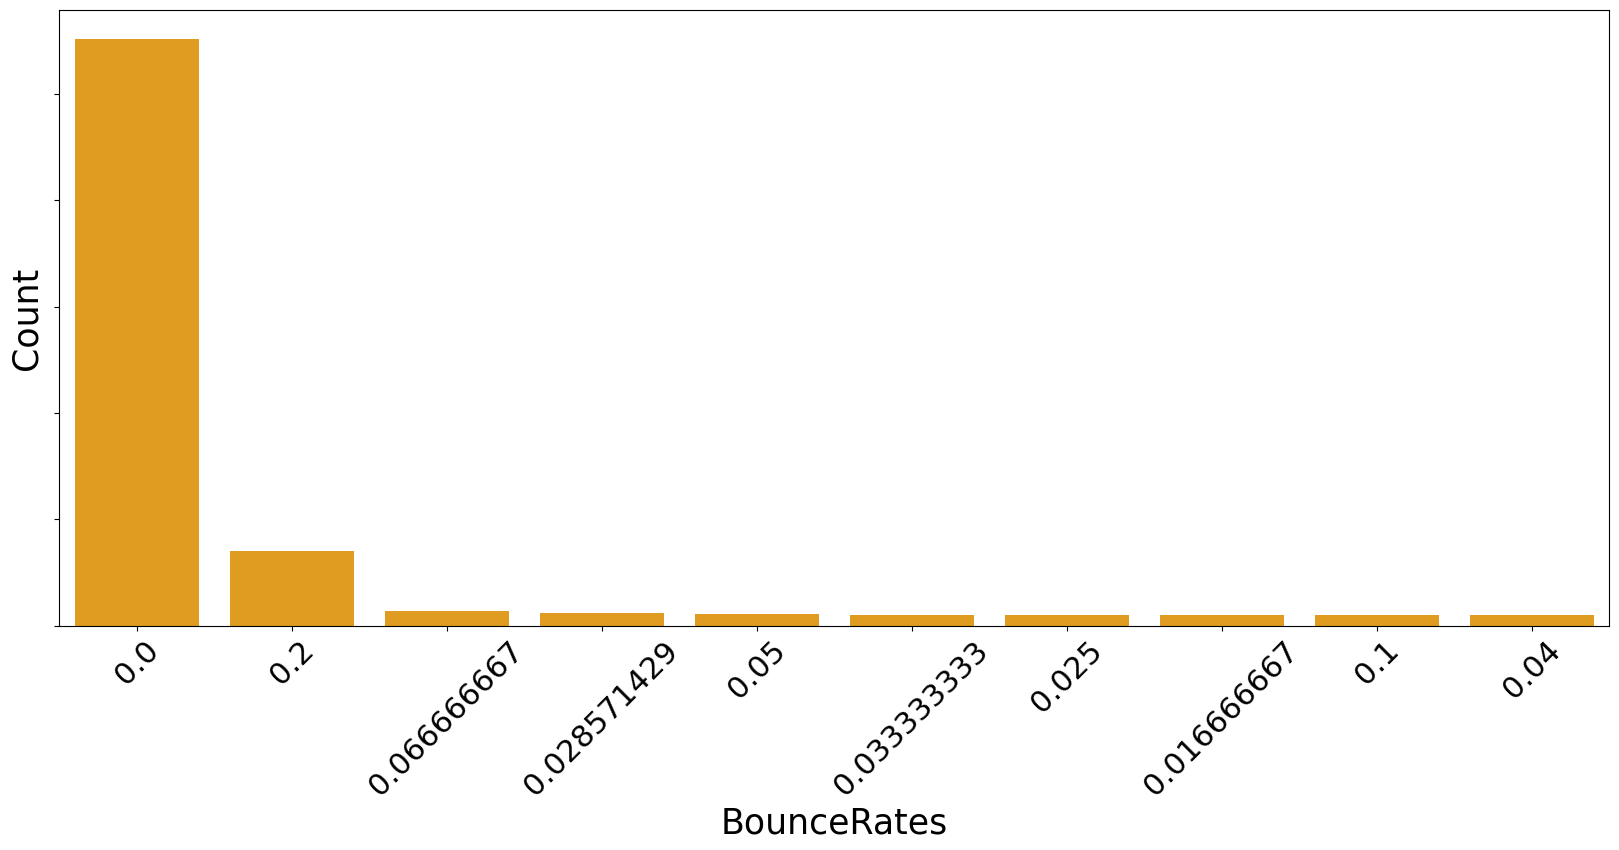

In [58]:
count_plot(df, 'BounceRates')

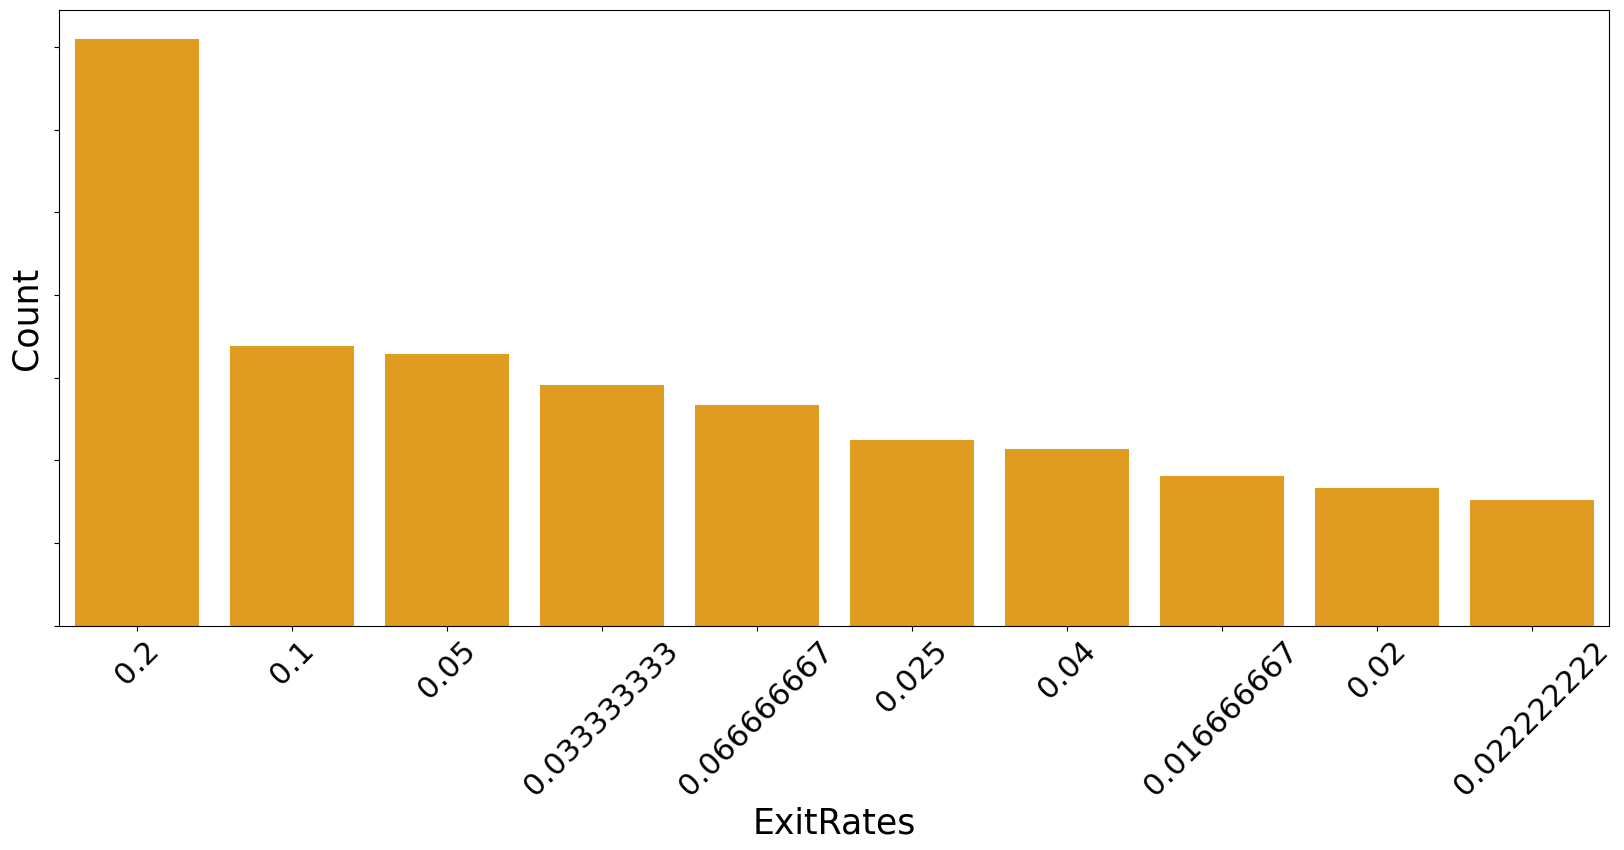

In [60]:
count_plot(df, 'ExitRates')

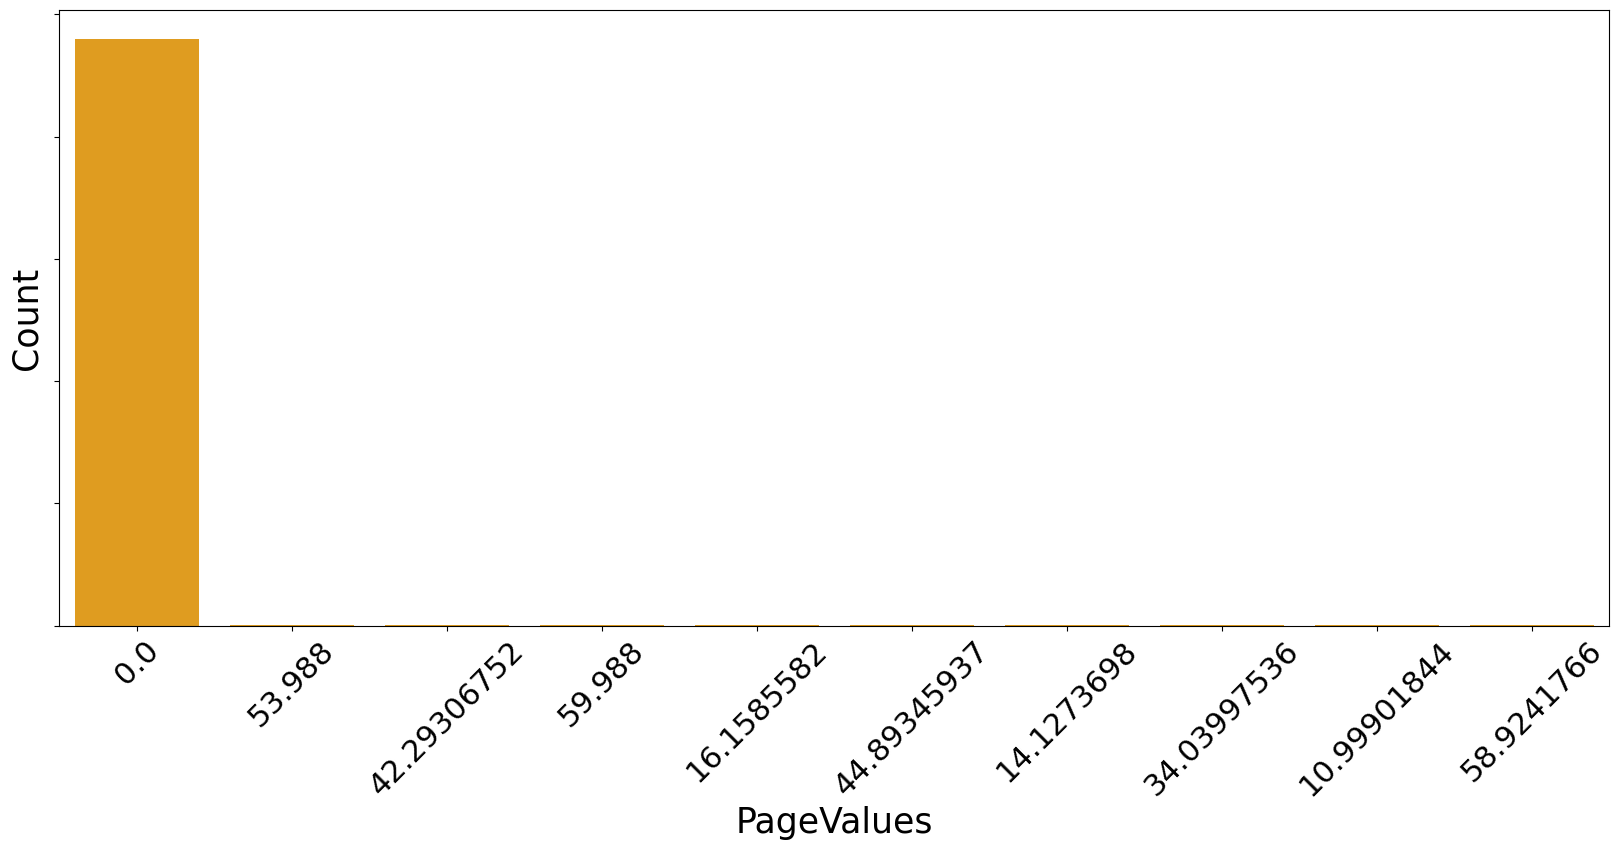

In [61]:
count_plot(df, 'PageValues')

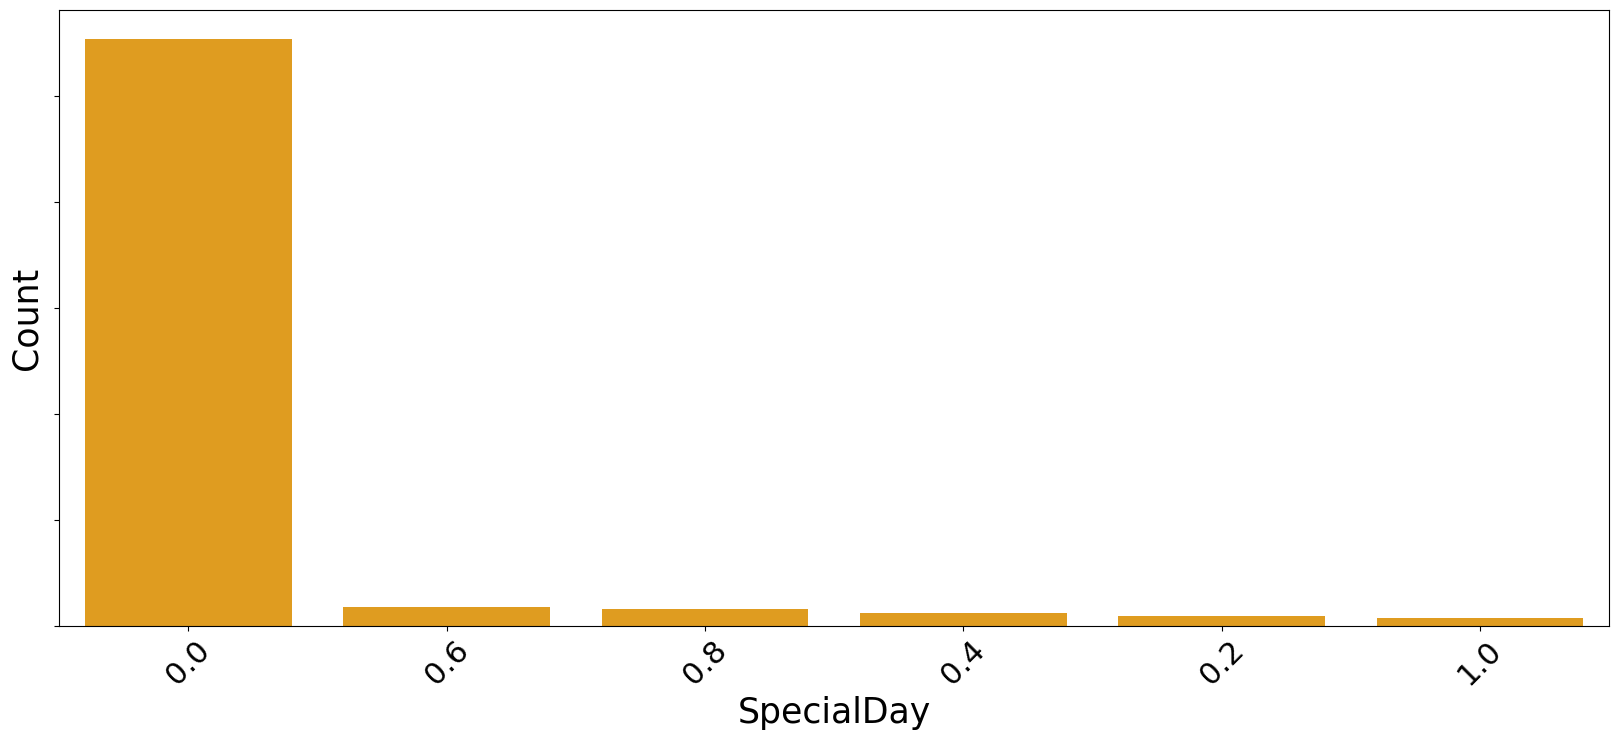

In [62]:
count_plot(df, 'SpecialDay')

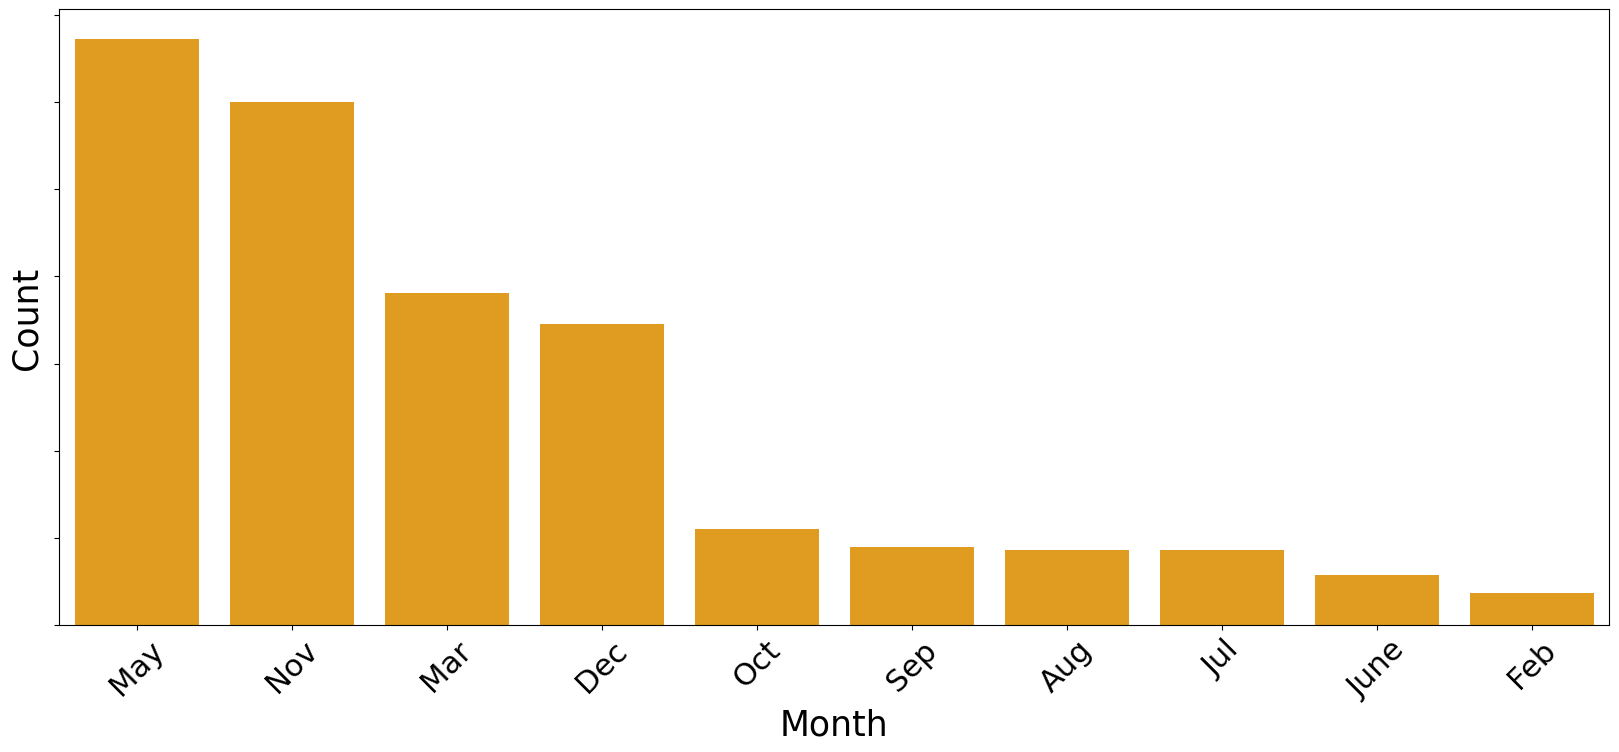

In [63]:
count_plot(df, 'Month')

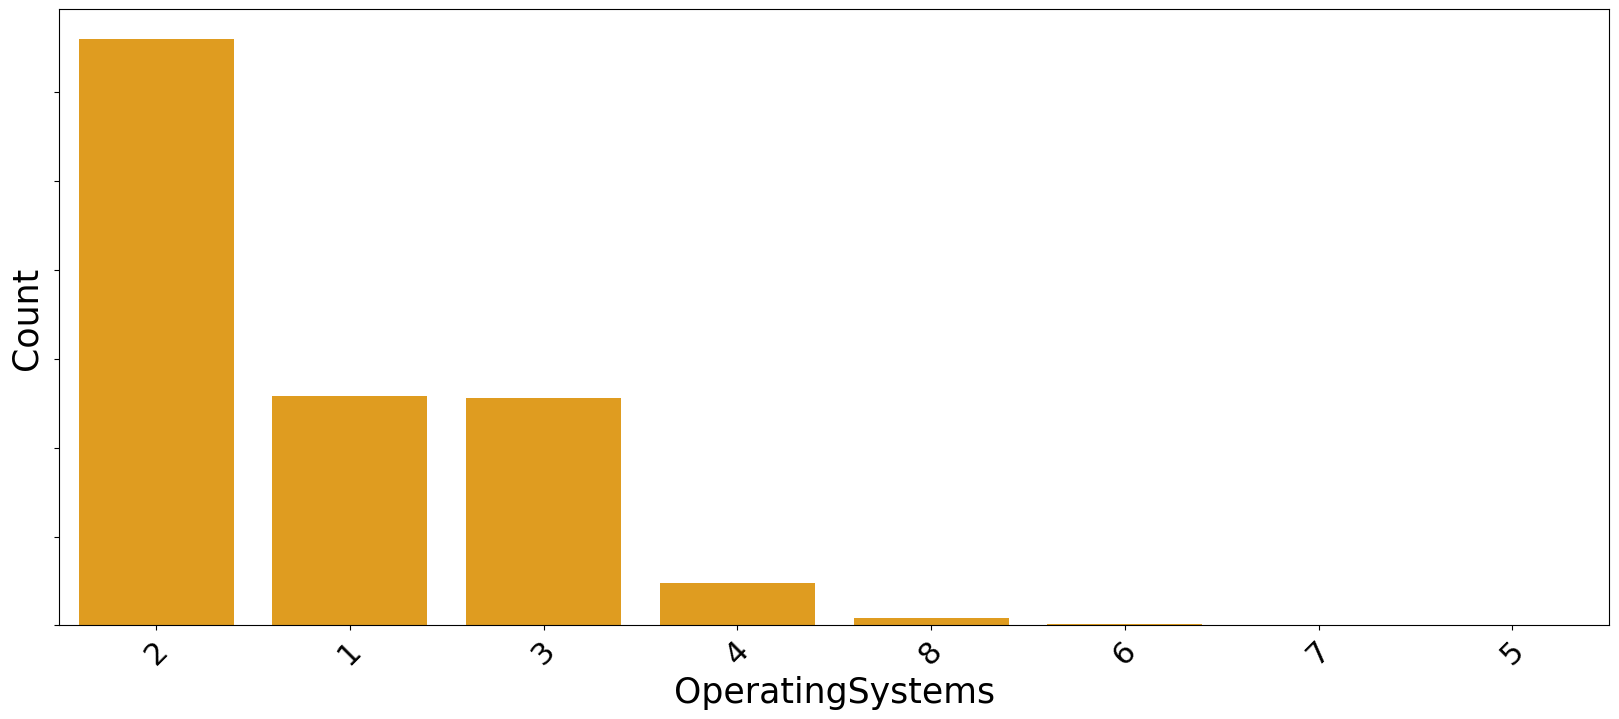

In [64]:
count_plot(df, 'OperatingSystems')

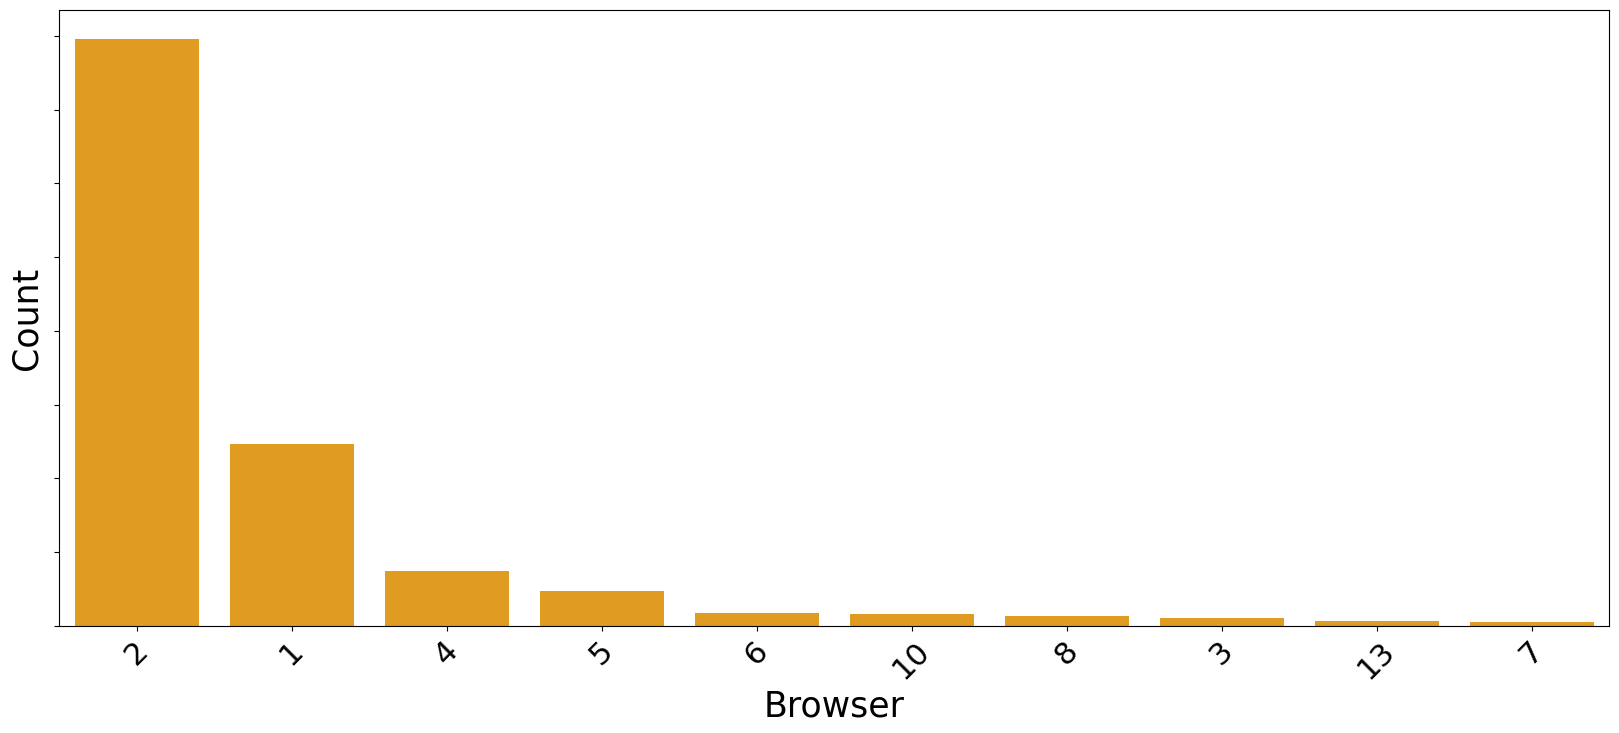

In [65]:
count_plot(df, 'Browser')

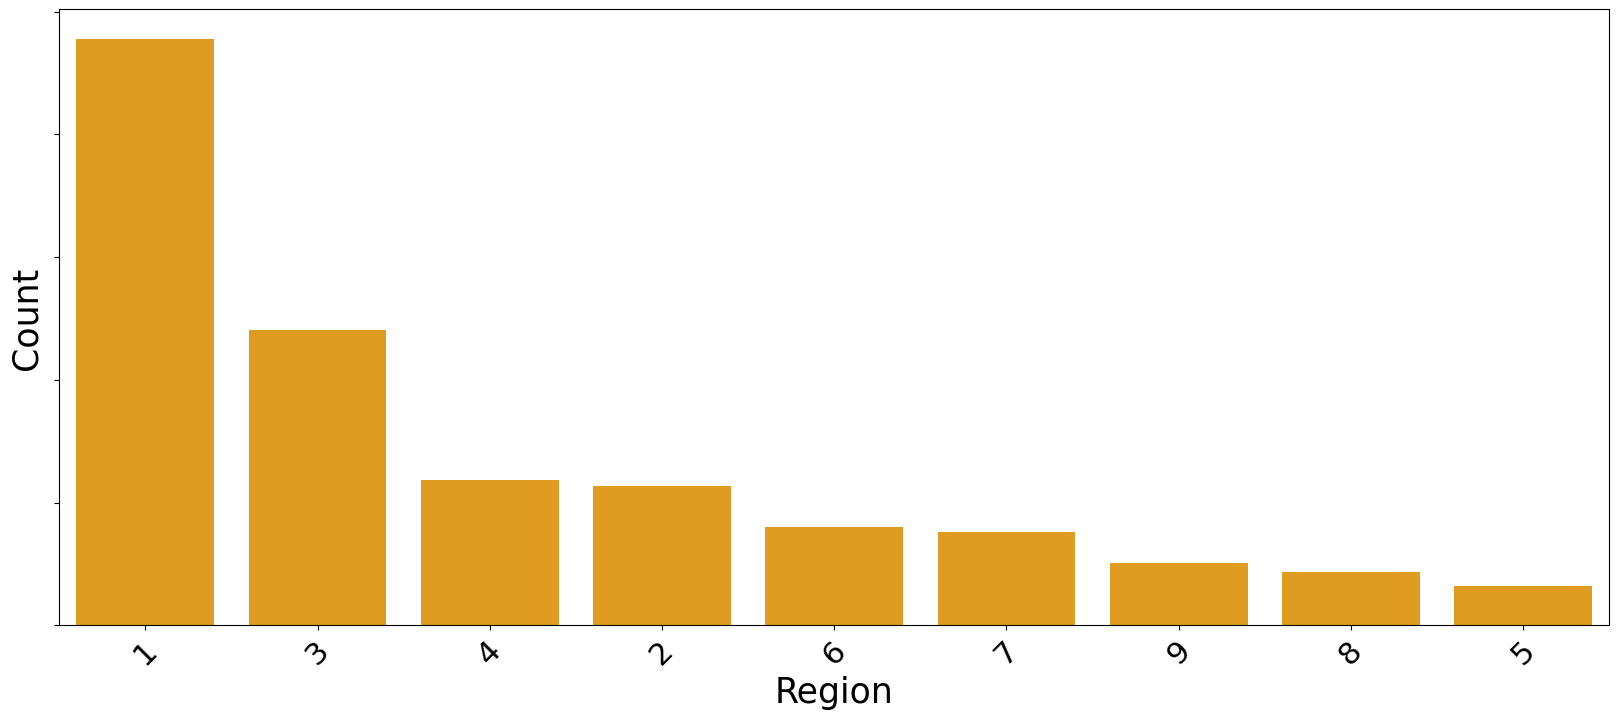

In [66]:
count_plot(df, 'Region')

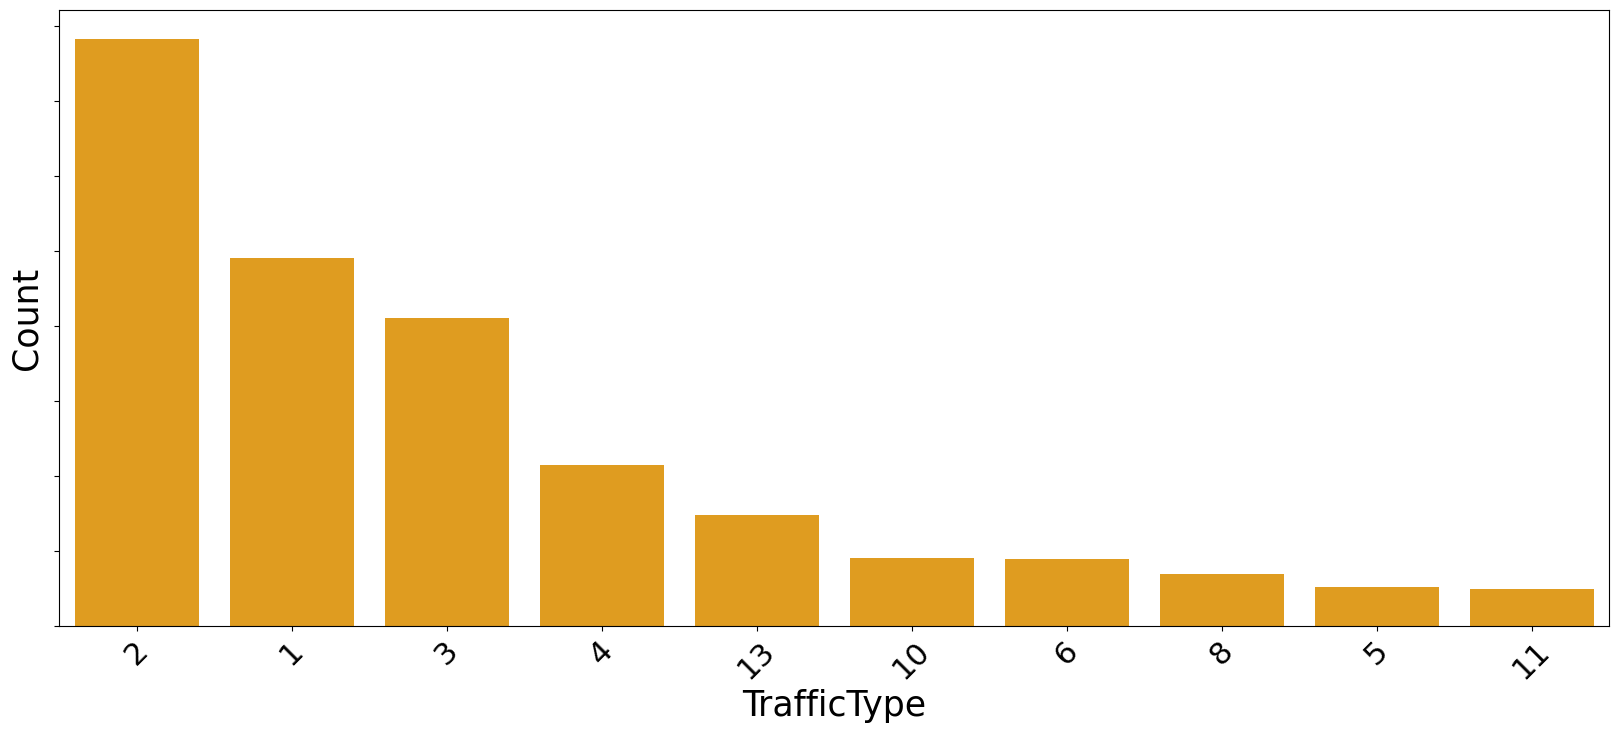

In [67]:
count_plot(df, 'TrafficType')

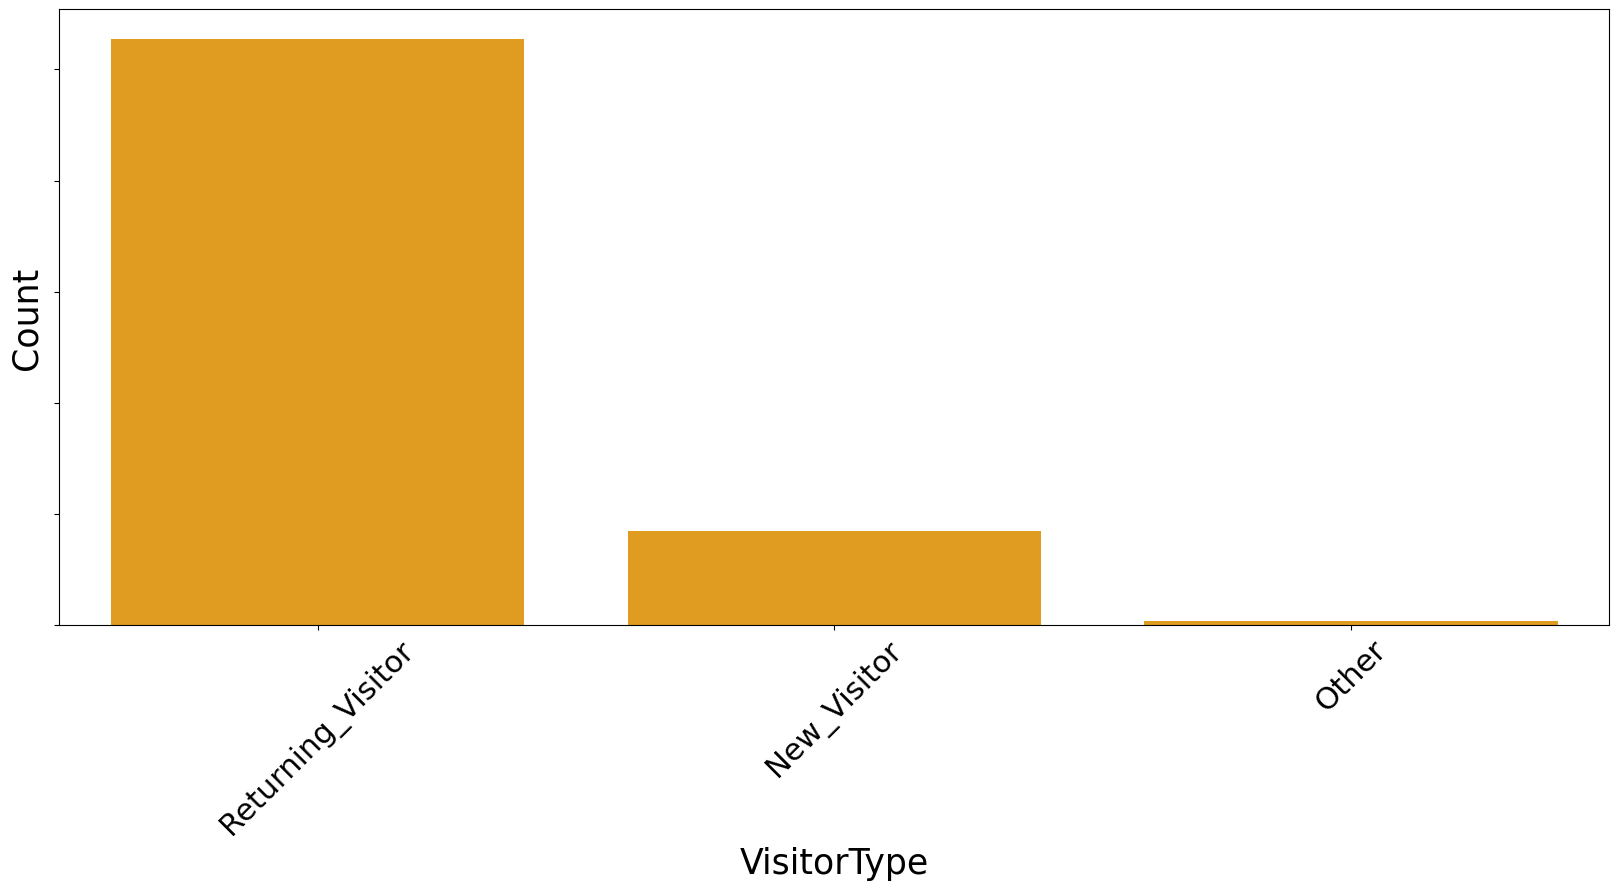

In [69]:
count_plot(df, 'VisitorType')

In [71]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

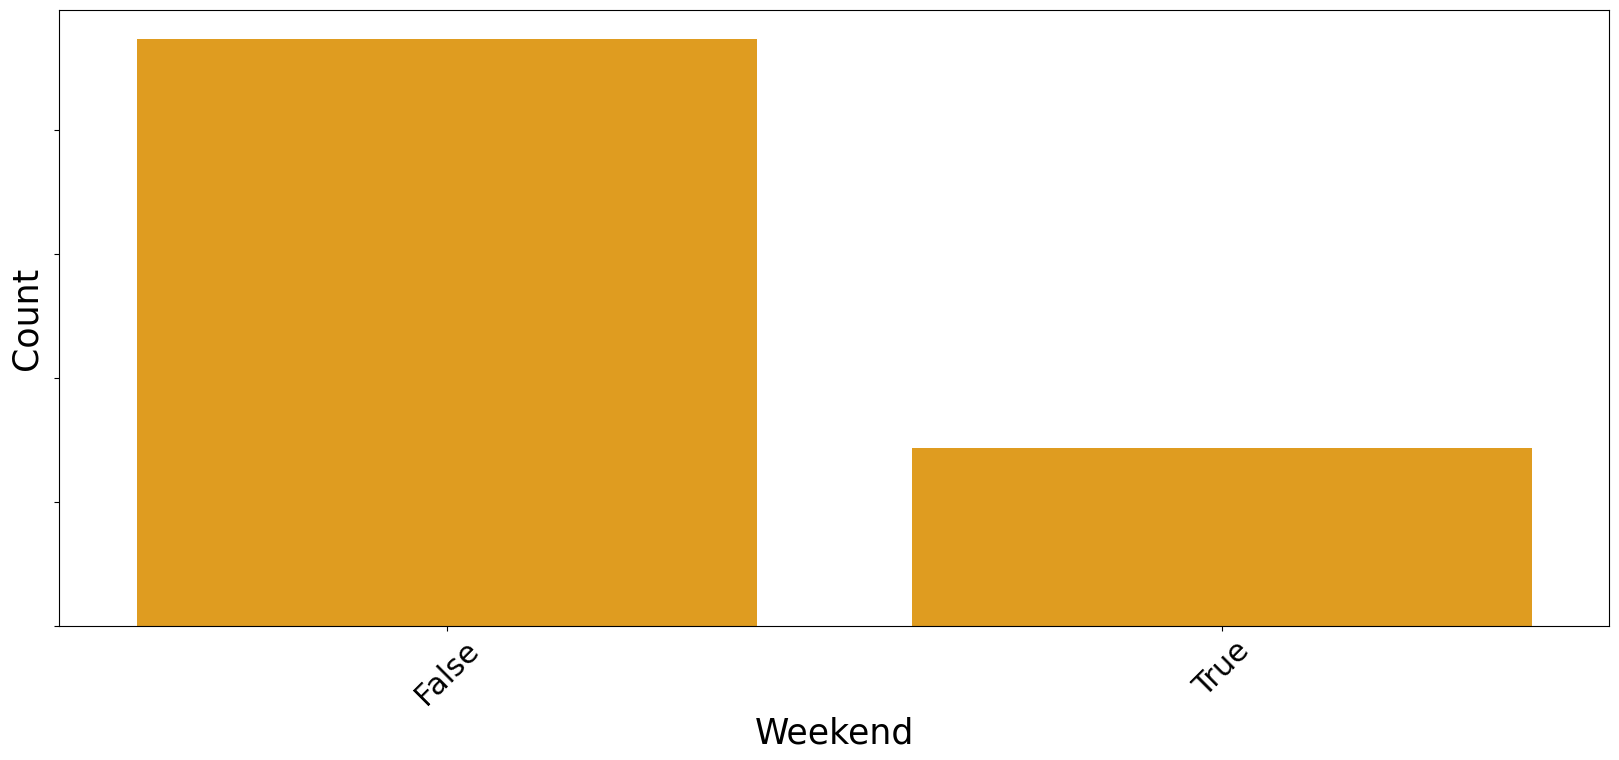

In [70]:
count_plot(df, 'Weekend')

In [72]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

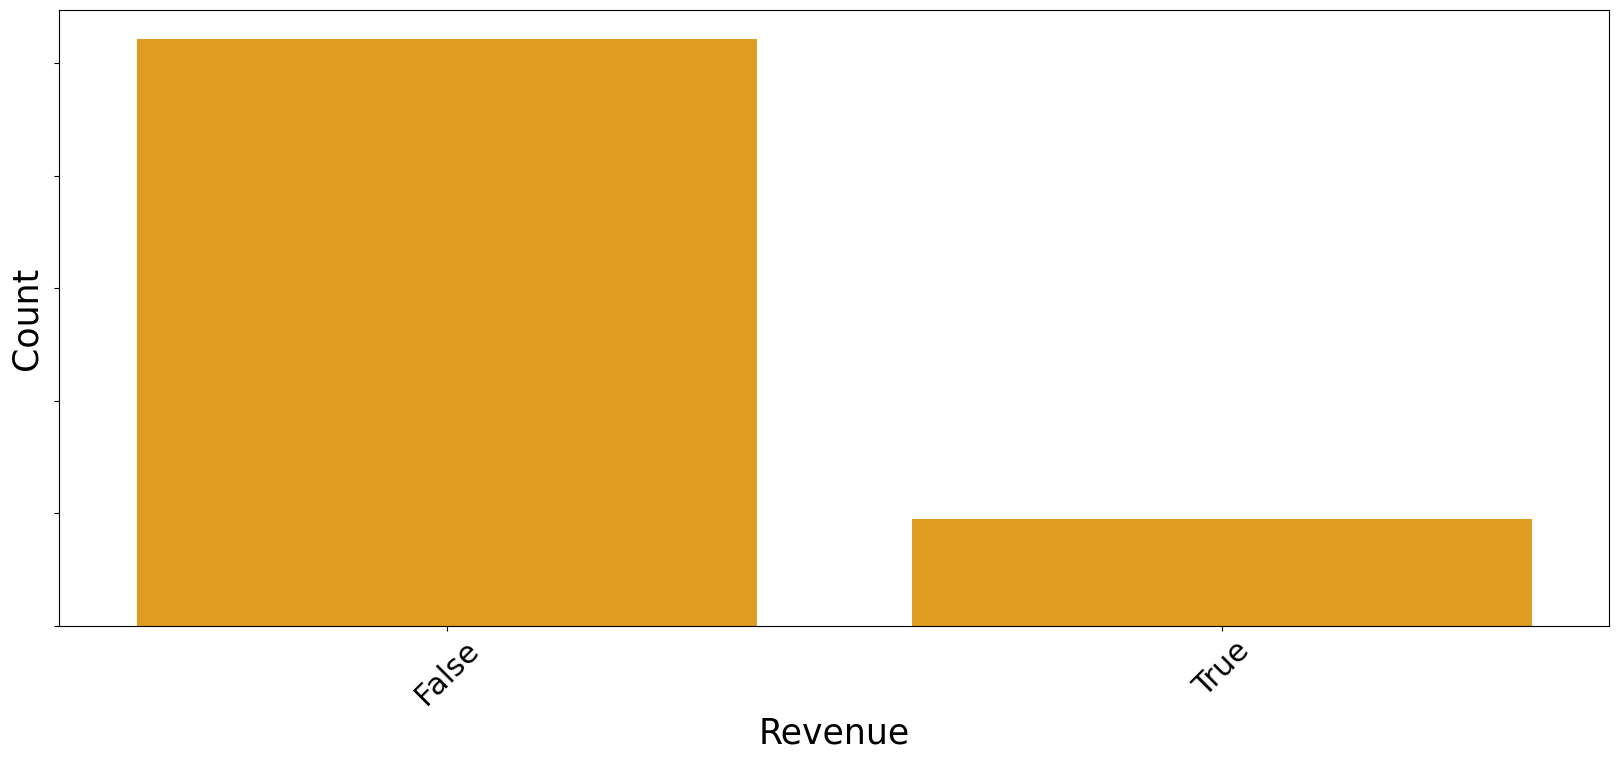

In [73]:
count_plot(df, 'Revenue')

###### Observations:

Almost all the features have right-skewed distributions and also the target columns 'Weekend', 'Revenue' and 'InforamtionDuration' are quite imbalanced.

### Label Encoding

In [75]:
le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Revenue'].unique()

array([0, 1], dtype=int64)

In [76]:
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Weekend'].unique()

array([0, 1], dtype=int64)

### Correlations

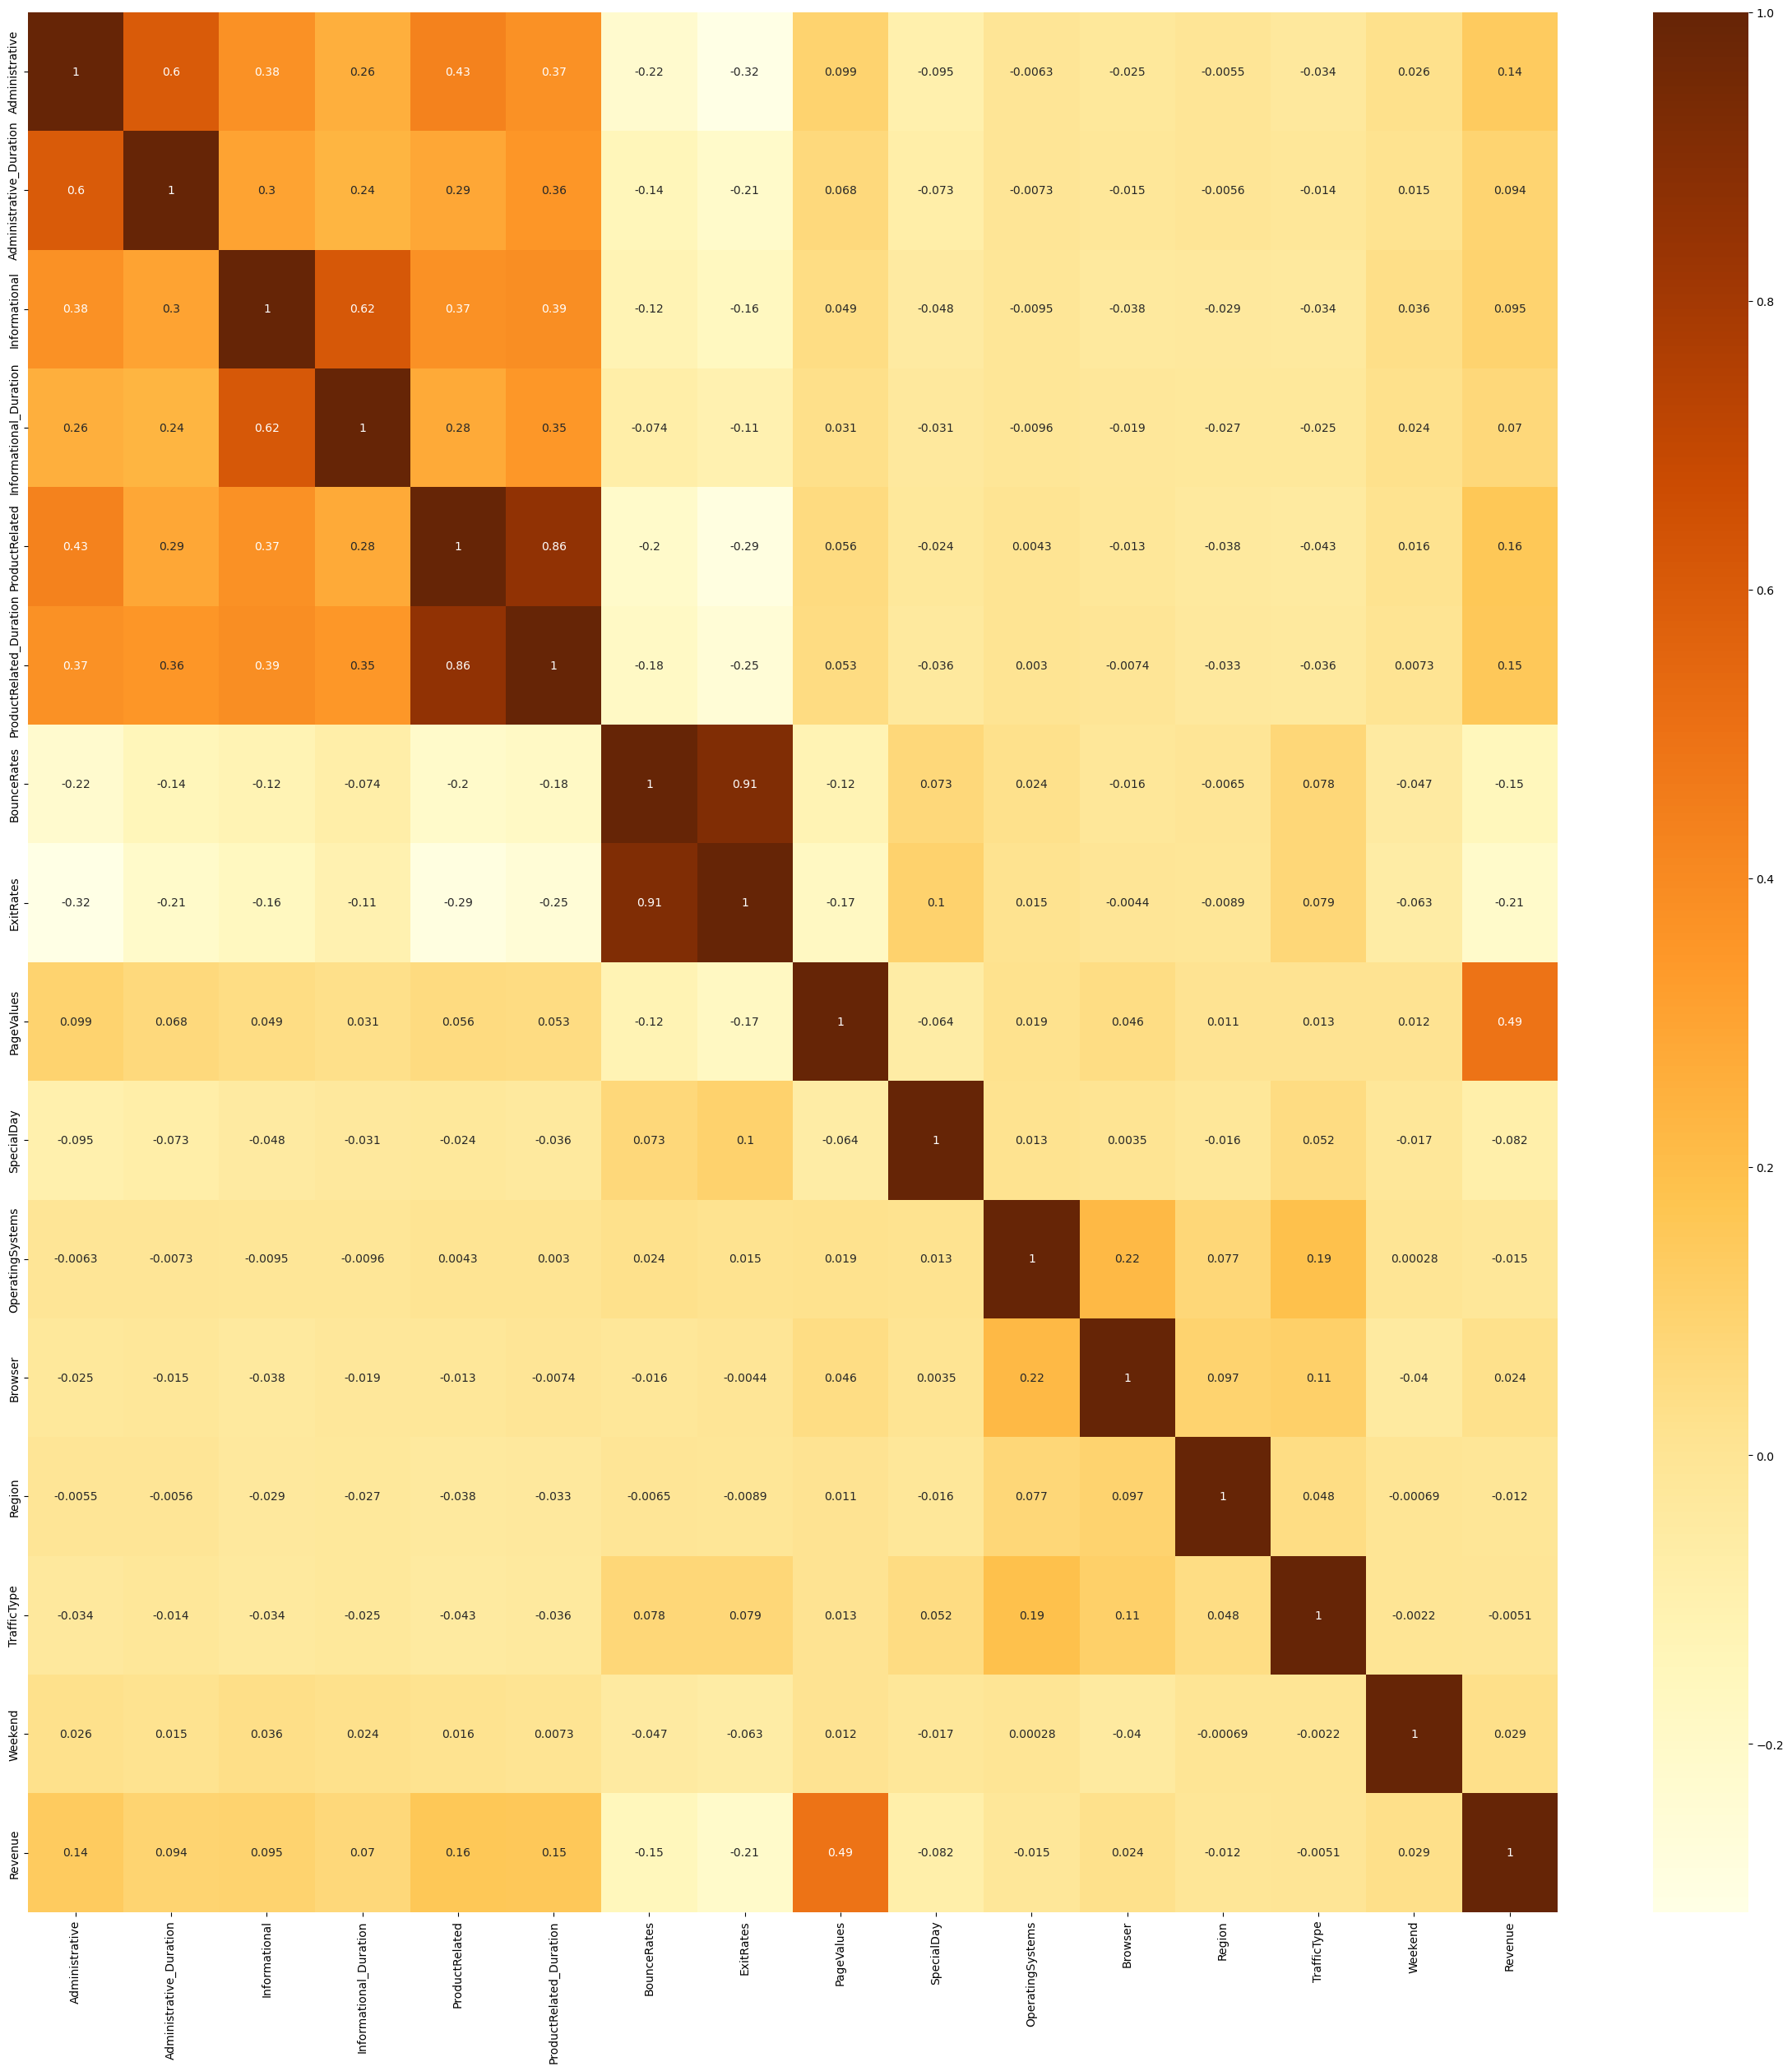

In [84]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, cmap = 'YlOrBr')
plt.show()

### Data Preparation for Predicting Revenue, Weekend and Informationa_Duration

In [86]:
X_revenue = df.drop(columns = ['TrafficType', 'Region', 'Browser', 'OperatingSystems', 
                                 'SpecialDay', 'Weekend', 'Informational_Duration'], axis=1)
y_revenue = df.Revenue

In [87]:
X_weekend = df.drop(columns = ['TrafficType', 'Region', 'OperatingSystems', 
                                'Revenue', 'Informational_Duration', 'ProductRelated_Duration'], axis=1)
y_weekend = df.Weekend

In [138]:
X_info = df.drop(columns = ['TrafficType', 'Region', 'Browser', 'OperatingSystems', 
                                 'SpecialDay', 'Weekend', 'Revenue', 'PageValues'], axis=1)
y_info = df.Informational_Duration

### Check Infos for OneHot Encoding

In [89]:
X_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   ProductRelated           12330 non-null  int64  
 4   ProductRelated_Duration  12330 non-null  float64
 5   BounceRates              12330 non-null  float64
 6   ExitRates                12330 non-null  float64
 7   PageValues               12330 non-null  float64
 8   Month                    12330 non-null  object 
 9   VisitorType              12330 non-null  object 
 10  Revenue                  12330 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.0+ MB


In [91]:
X_revenue = pd.get_dummies(X_revenue)

In [92]:
X_weekend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   ProductRelated           12330 non-null  int64  
 4   BounceRates              12330 non-null  float64
 5   ExitRates                12330 non-null  float64
 6   PageValues               12330 non-null  float64
 7   SpecialDay               12330 non-null  float64
 8   Month                    12330 non-null  object 
 9   Browser                  12330 non-null  int64  
 10  VisitorType              12330 non-null  object 
 11  Weekend                  12330 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 1.1+ MB


In [93]:
X_weekend = pd.get_dummies(X_weekend)

In [94]:
X_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   Month                    12330 non-null  object 
 9   VisitorType              12330 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 963.4+ KB


In [95]:
X_info = pd.get_dummies(X_info)
X_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   Month_Aug                      12330 non-null  uint8  
 9   Month_Dec                      12330 non-null  uint8  
 10  Month_Feb                      12330 non-null  uint8  
 11  Month_Jul                      12330 non-null  uint8  
 12  Month_June                     12330 non-null 

### Create training and testing data splits

In [122]:
X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(X_revenue, y_revenue, test_size = 0.3, random_state=1)

In [123]:
X_train_weekend, X_test_weekend, y_train_weekend, y_test_weekend = train_test_split(X_weekend, y_weekend, test_size = 0.3, random_state=1)

In [124]:
X_train_info, X_test_info, y_train_info, y_test_info = train_test_split(X_info, y_info, test_size = 0.3, random_state=1)

### Model Training

In [125]:
rfc_rev = RandomForestClassifier(max_depth = 10)
rfc_week = RandomForestClassifier(max_depth = 10)
rfr = RandomForestRegressor(max_depth = 10)

In [126]:
rfc_rev.fit(X_train_revenue, y_train_revenue)
rfc_week.fit(X_train_weekend, y_train_weekend)
rfr.fit(X_train_info, y_train_info)

RandomForestRegressor(max_depth=10)

### Model Evaluation

In [127]:
def model_metrics(model, X_test, y_test):
    predictions  = model.predict(X_test)
    accuracy     = metrics.accuracy_score(y_test, predictions)
    recallscore  = metrics.recall_score(y_test, predictions)
    precision    = metrics.precision_score(y_test, predictions)
    roc_auc      = metrics.roc_auc_score(y_test, predictions)
    f1score      = metrics.f1_score(y_test, predictions) 
    
    score = pd.DataFrame({"Model"           : [f"{model}"],
                          "Accuracy_score"  : [accuracy],
                          "Recall_score"    : [recallscore],
                          "Precision"       : [precision],
                          "f1_score"        : [f1score],
                          "Area_under_curve": [roc_auc]
                         })
    return score

In [128]:
rfc_rev_metric = model_metrics(rfc_rev, X_test_revenue, y_test_revenue)
rfc_rev_metric

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,RandomForestClassifier(max_depth=10),1.0,1.0,1.0,1.0,1.0


In [129]:
rfc_week_metric = model_metrics(rfc_week, X_test_weekend, y_test_weekend)
rfc_week_metric

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,RandomForestClassifier(max_depth=10),1.0,1.0,1.0,1.0,1.0


In [131]:
# Revenue Prediction
metrics.confusion_matrix(y_test_revenue, rfc_rev.predict(X_test_revenue))

array([[3149,    0],
       [   0,  550]], dtype=int64)

In [132]:
# Weekend prediction
metrics.confusion_matrix(y_test_weekend, rfc_week.predict(X_test_weekend))

array([[2862,    0],
       [   0,  837]], dtype=int64)

In [133]:
# Informational_Duration Prediction

y_pred = rfr.predict(X_test_info)
r2 = metrics.r2_score(y_test_info, y_pred)
score_ = rfr.score(X_test_info, y_test_info)

In [137]:
print(f"Accuracy is: {round(score_*100, 2)}%")

Accuracy is: 99.91%
